<h3>  &nbsp;&nbsp;Train on GPU&nbsp;&nbsp; <a href="https://cloud.google.com/tpu/"><img valign="middle" src="https://raw.githubusercontent.com/GoogleCloudPlatform/tensorflow-without-a-phd/master/tensorflow-rl-pong/images/tpu-hexagon.png" width="50"></a></h3>

1. On the main menu, click Runtime and select **Change runtime type**. Set "GPU" as the hardware accelerator.
1. Click Runtime again and select **Runtime > Run All**. You can also run the cells manually with Shift-ENTER. 

In [1]:
import keras
keras.__version__
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']

In [0]:
from keras import layers
from keras import models
from keras.datasets import cifar10
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

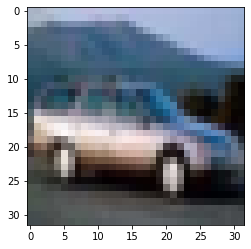

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)

plt.show()

In [0]:
# MODIFY THE CODE TO ADD A VALIDATION SET
validation_count = 2500

train_images = train_images.reshape((50000, 32, 32, 3))
train_images = train_images.astype('float32') / 255

validation_images = train_images[:validation_count]
train_images = train_images[validation_count:]

test_images = test_images.reshape((10000, 32, 32, 3))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
validation_labels = train_labels[:validation_count]
train_labels = train_labels[validation_count:]
test_labels = to_categorical(test_labels)

In [5]:
backbone = keras.applications.densenet.DenseNet121(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
backbone.trainable = False

In [7]:
import cv2
import tqdm
import numpy as np
def extract(images):
    output = []
    with tqdm.tqdm(total=images.shape[0]) as pbar:
        for image in images:
            img = cv2.resize(image, dsize=(224, 224), interpolation=cv2.INTER_CUBIC).reshape(1,224,224,3)
            output.append(backbone.predict(img))
            pbar.update(1)
    return output

test_images = np.concatenate(extract(test_images))
train_images = np.concatenate(extract(train_images))
validation_images = np.concatenate(extract(validation_images))
# backbone.predict(test_images)

100%|██████████| 2500/2500 [00:43<00:00, 58.07it/s]


In [9]:
# MAKE WHATEVER CHANGES ARE NECESSARY
# TO GET 0.7 ACCURACY ON THE TEST SET

model = models.Sequential()
model.add(layers.Dense(1000, activation='relu',input_shape=[1000]))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10010     
Total params: 1,011,010
Trainable params: 1,011,010
Non-trainable params: 0
_________________________________________________________________


In [11]:
  # MAKE WHATEVER CHANGES ARE NECESSARY
  # TO GET 0.7 ACCURACY ON THE TEST SET
epichs = 100
model_hist = model.fit(train_images, train_labels,
                       validation_data=(validation_images,validation_labels),
                        epochs=epichs, batch_size=500)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 47500 samples, validate on 2500 samples
Epoch 1/100
47500/47500 [==============================] - 2s 43us/step - loss: 1.6653 - acc: 0.5459 - val_loss: 1.1749 - val_acc: 0.6140
Epoch 2/100
47500/47500 [==============================] - 1s 11us/step - loss: 1.0744 - acc: 0.6382 - val_loss: 1.0186 - val_acc: 0.6488
Epoch 3/100
47500/47500 [==============================] - 1s 11us/step - loss: 0.9748 - acc: 0.6693 - val_loss: 0.9562 - val_acc: 0.6712
Epoch 4/100
47500/47500 [==============================] - 1s 11us/step - loss: 0.9225 - acc: 0.6884 - val_loss: 0.9236 - val_acc: 0.6936
Epoch 5/100
47500/47500 [==============================] - 1s 11us/step - loss: 0.8868 - acc: 0.7002 - val_loss: 0.9001 - val_acc: 0.6952
Epoch 6/100
47500/47500 [==============================] - 1s 11us/step - loss: 0.8593 - acc: 0.7098 - val_loss: 0.8850 - val_acc: 0.7072
Epoch 7/100
47500/47500 [==

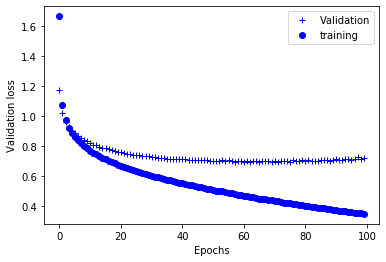

In [12]:
import matplotlib.pyplot as plt

epochs = range(0, epichs)
train_loss = model_hist.history['loss']
val_loss= model_hist.history['val_loss']

plt.plot(epochs, val_loss, 'b+', label='Validation')
plt.plot(epochs, train_loss, 'bo', label='training')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)
test_loss

10000/10000 [==============================] - 1s 50us/step
test_acc: 0.7803


0.7103838948726654

In [0]:
model.save_weights('./cifar10.h5', overwrite=True)